# Introduction to data science: data

[**This notebook is available on Google Colab.**](https://colab.research.google.com/drive/1U_8I6k80LvgC6bwE6RgRvF6QI0cIdEQK)

#### This is a very quick introduction. Time needed: about an hour.

We'll explore the Pandas package for simple data handling tasks using geoscience data examples, and we'll follow it up with a quick look at `scikit-learn` for fitting machine learning models and making predictions.

## Reading a CSV

Pandas reads files from disk in tabular form &mdash; [here is a list](https://pandas.pydata.org/docs/user_guide/io.html) of all the formats that it can read and write. A very common format is CSV, so let's load one!

Conveniently, you can give `pandas` the CSV in a URL or a file path:

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/scienxlab/datasets/main/rpc/rpc-3-imbalanced.csv"
df = pd.read_csv(url)
df.head()

,RPC,Description,Lithology,Vp,Vs,Rho
0,101023,Gray Shale,shale,4953.660011,2957.260132,2.71
1,100978,Olentangy Shale,shale,3444.658279,2318.002224,2.68
2,100993,Brown Gas Shale,shale,3507.803917,2218.529940,2.56
3,101048,Shale 2 (Density is assumed constant),shale,2988.889933,1633.329988,2.60
4,100417,Tight gas shale,shale,3642.000000,2221.000000,2.46


In [2]:
df.dtypes

RPC              int64
Description     object
Lithology       object
Vp             float64
Vs             float64
Rho            float64
dtype: object

<div style="background: #e0ffe0; border: solid 2px #d0f0d0; border-radius:3px; padding: 1em; color: darkgreen">

<h3>Let's explore the data</h3>

- Get a column, plot a column
- Do (vectorized) math on column(s)
- Using `df.loc`
- Changing the index with `df.set_index()`
- Selecting subsets of `df` with `df.loc`
- Using `df.describe()` with `include='all'`
</div>

<Axes: >

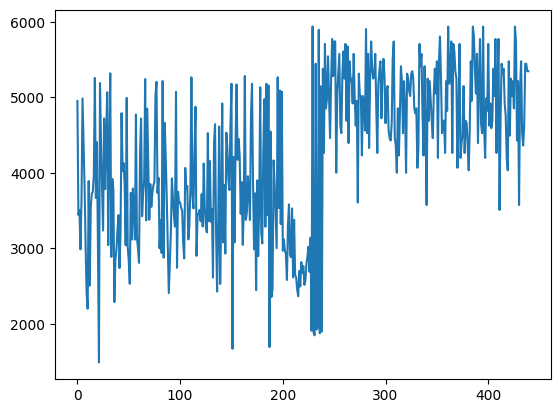

In [3]:
df['Vp'].plot()

In [4]:
df['Vp']/1000

0      4.953660
1      3.444658
2      3.507804
3      2.988890
4      3.642000
         ...   
435    4.625980
436    5.446190
437    5.446190
438    5.347770
439    5.347770
Name: Vp, Length: 440, dtype: float64

In [6]:
df = df.set_index('RPC')
df.head()
df.loc[101023]

Description     Gray Shale
Lithology            shale
Vp             4953.660011
Vs             2957.260132
Rho                   2.71
Name: 101023, dtype: object

In [7]:
df.loc[101023]['Vp']

np.float64(4953.660011)

In [8]:
df.loc[101023, ['Vp','Vs']]

Vp    4953.660011
Vs    2957.260132
Name: 101023, dtype: object

In [9]:
df.loc[df['Vp'] > 5000]

,Description,Lithology,Vp,Vs,Rho
RPC,,,,,
100738,Beijing Jurassic Shale,shale,5258.460000,2262.080000,2.55
101108,Oficina Dolomitized Shale,shale,5191.000000,3024.000000,2.78
101007,Brown Gas Shale,shale,5069.825172,2944.804907,2.56
100739,Beijing Jurassic Shale,shale,5320.420000,2276.110000,2.55
101111,Oficina Dolomitized Shale,shale,5244.000000,3040.000000,2.78
...,...,...,...,...,...
102279,R.PRICE 10926.5 #48,dolomite,5479.000000,2739.500000,2.56
102225,R.PRICE 10916.5 #38,dolomite,5446.190000,3116.800000,2.44
102088,R.PRICE 10883.5 #7,dolomite,5446.190000,2998.690000,2.57


In [10]:
df.loc[df['Vp'] > 5000, ['Vp','Vs']]

,Vp,Vs
RPC,,
100738,5258.460000,2262.080000
101108,5191.000000,3024.000000
101007,5069.825172,2944.804907
100739,5320.420000,2276.110000
101111,5244.000000,3040.000000
...,...,...
102279,5479.000000,2739.500000
102225,5446.190000,3116.800000
102088,5446.190000,2998.690000


In [11]:
df.describe(include='all')

,Description,Lithology,Vp,Vs,Rho
count,440,440,440.000000,440.000000,428.000000
unique,74,3,NaN,NaN,NaN
top,Shale,shale,NaN,NaN,NaN
freq,31,200,NaN,NaN,NaN
mean,NaN,NaN,4241.400263,2404.569500,2.471570
std,NaN,NaN,1017.116305,623.491742,0.168254
min,NaN,NaN,1490.711927,839.570000,1.770000
25%,NaN,NaN,3444.243709,2008.362500,2.387500
50%,NaN,NaN,4396.045268,2559.060000,2.510000
75%,NaN,NaN,5150.920000,2858.632148,2.570000


<div style="background: #e0ffe0; border: solid 2px #d0f0d0; border-radius:3px; padding: 1em; color: darkgreen">

<h3>Exercise</h3>

- Have a quick look at [the Pandas documentation](https://pandas.pydata.org/docs/).
- How are the missing values distributed across the lithologies?
- The Gardner equation for computing density is given by $\rho_{\text{Gardner}} = 0.310 \times (V_p)^{0.25}$. Define a function that computes the Gardner density, then estimate and put it in a new column called `Rho_Gardner`.
- Use `sns.kdeplot()` to compare the distribution of the new column to the actual `Rho` data.
    -  EXTRA: You could also use `sns.histplot()`, which gives a slightly different representation. How do they differ, and can you make it closer to the representation from `kdeplot()`? Can you spot any issues with using any of these methods with default parameters?
- Fill the empty (NaN) values in density with your computed densities. <a title="Use `pd.Series.fillna()` on the 'Rho' column."><ins>Hover here for hint</ins>.</a>
</div>

In [12]:
def gardners_equation_density(velocity):
    return 0.31*velocity**0.25

ged = gardners_equation_density(df['Vp'])
df['Rho_Gardner'] = ged
df.head()

,Description,Lithology,Vp,Vs,Rho,Rho_Gardner
RPC,,,,,,
101023,Gray Shale,shale,4953.660011,2957.260132,2.71,2.600718
100978,Olentangy Shale,shale,3444.658279,2318.002224,2.68,2.374916
100993,Brown Gas Shale,shale,3507.803917,2218.529940,2.56,2.385726
101048,Shale 2 (Density is assumed constant),shale,2988.889933,1633.329988,2.60,2.292130
100417,Tight gas shale,shale,3642.000000,2221.000000,2.46,2.408223


<Axes: xlabel='Rho', ylabel='Density'>

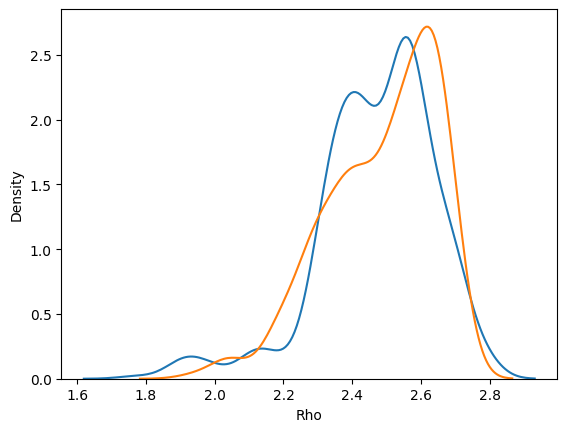

In [13]:
import seaborn as sns
sns.kdeplot(df['Rho'])
sns.kdeplot(df['Rho_Gardner'])

<Axes: xlabel='Rho', ylabel='Count'>

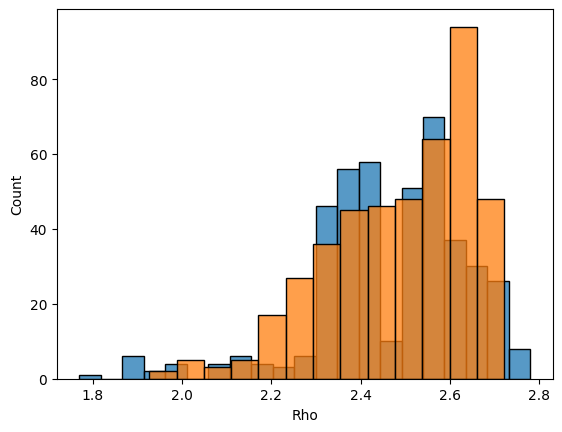

In [14]:
sns.histplot(df['Rho'])
sns.histplot(df['Rho_Gardner'])

In [15]:
df['Rho'] = df['Rho'].fillna(df['Rho_Gardner'])
df.head()

,Description,Lithology,Vp,Vs,Rho,Rho_Gardner
RPC,,,,,,
101023,Gray Shale,shale,4953.660011,2957.260132,2.71,2.600718
100978,Olentangy Shale,shale,3444.658279,2318.002224,2.68,2.374916
100993,Brown Gas Shale,shale,3507.803917,2218.529940,2.56,2.385726
101048,Shale 2 (Density is assumed constant),shale,2988.889933,1633.329988,2.60,2.292130
100417,Tight gas shale,shale,3642.000000,2221.000000,2.46,2.408223


In [ ]:
df.describe()
#Now we dont have any NaN values anymore

,Vp,Vs,Rho,Rho_Gardner
count,440.000000,440.000000,440.000000,440.000000
mean,4241.400263,2404.569500,2.467141,2.486634
std,1017.116305,623.491742,0.175744,0.161517
min,1490.711927,839.570000,1.770000,1.926239
25%,3444.243709,2008.362500,2.370000,2.374844
50%,4396.045268,2559.060000,2.510000,2.524220
75%,5150.920000,2858.632148,2.570000,2.626231
max,5940.000000,3477.690000,2.780000,2.721500


## Visual exploration of the data

We can easily visualize the properties of each variable, both individuallt and pairwise, using a `PairPlot`. The library `seaborn` integrates with matplotlib to make these kind of plots easily.

In [ ]:
import seaborn as sns

sns.pairplot(df)

In [ ]:
sns.pairplot(df,
             hue="Lithology",
             vars=['Vp','Vs','Rho'])

We can have a lot of control over all of the elements in the pair-plot by using the `PairGrid` object.

In [ ]:
import matplotlib.pyplot as plt

g = sns.PairGrid(df, hue="Lithology", vars=['Vp','Vs','Rho'], height=4)

g.map_upper(plt.scatter, alpha=0.4)
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist, bins=20,)
g.add_legend()

## Export for machine learning

<div style="background: #e0ffe0; border: solid 2px #d0f0d0; border-radius:3px; padding: 1em; color: darkgreen">

<h3>EXERCISE</h3>

Export the following columns to a new CSV, in this order: Rho, Vp, Vs, and Lithology. Some details:

- Call the file `mydata.csv`.
- Use 3 decimal places for all floats.
- Make sure Pandas does not include the RPC catalog numbers.
</div>

<hr />

<p style="color:gray"> adapted from ©2024 Matt Hall / Equinor. Licensed CC BY.</p>